# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [44]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.portfolio.tracker import Tracker

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [43]:
# p = Portfolio("coinbase", force=True,configuration=c)
p = Portfolio("coinbase",configuration=c)




####### PORTFOLIO 

MyCoinbase( isHistoric:True, last updated:2022-03-28 19:54:53.535435+00:00, N_accounts:31)


Warning! There are 14 transactionsthat were EXCLUDED in std_df.

Warning! Errors while handling transactions:
TransactionsHistory(Transactions:188 - Processed:188, Unhandled:0 - Errors:9)


In [46]:
print(p.coinbase.mycoinbase_report())

ALGO : EUR 230.65
AAVE : EUR 160.87
SUSHI : EUR 78.82
MATIC : EUR 405.32
UNI : EUR 137.94
ADA : EUR 168.75
USDC : EUR 0.01
---
Portfolio: EUR 1182.36


In [47]:
p.coinbase.active_accounts

['ALGO', 'AAVE', 'SUSHI', 'MATIC', 'UNI', 'ADA', 'USDC']

In [48]:
p.std_df.head()

,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None


## Total fees

In [49]:
p.total_fees()


205.53999999999965

## Portfolio total investment`
Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [50]:
p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit", "fiat_withdrawal"])
].groupby("type")[["amount"]].sum()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio value tracker

In [20]:
t = Tracker(p.std_df, stocks_start="1-1-2021", benchmark="ETH",configuration=c)



### Closedata

`Tracker` uses locally stored closedata to track the portfolio daily values.

In [21]:
t.closedata

,Date,Close,symbol
0,2017-10-01 00:00:00+00:00,3729.454806,BTC
1,2017-10-02 00:00:00+00:00,3758.690499,BTC
2,2017-10-03 00:00:00+00:00,3675.702350,BTC
3,2017-10-04 00:00:00+00:00,3597.924171,BTC
4,2017-10-05 00:00:00+00:00,3695.389871,BTC
...,...,...,...
8137,2022-03-23 00:00:00+00:00,0.760962,ALGO
8138,2022-03-24 00:00:00+00:00,0.809893,ALGO
8139,2022-03-25 00:00:00+00:00,0.810221,ALGO
8140,2022-03-26 00:00:00+00:00,0.830618,ALGO


The  `error_log` attributes contains the log from loading data.

In [22]:
t.error_log


[]

### Benchmark

Compare stocks to benchmark.

In [23]:
t.benchmark_df.head()


,Close
Date,
2017-10-01 00:00:00+00:00,256.044212
2017-10-02 00:00:00+00:00,253.580263
2017-10-03 00:00:00+00:00,248.989454
2017-10-04 00:00:00+00:00,248.964687
2017-10-05 00:00:00+00:00,252.593705


#### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [24]:
t.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
5,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
6,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
7,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
8,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


#### Daily snapshots

The module produces daily snapshots of the portfolio balance.

In [25]:
t.daily_snapshots[-1]


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot
155,2021-09-09 23:30:55+00:00,buy,152.199381,ADA,692.45,2.142006,2022-03-27 00:00:00+00:00
151,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-03-27 00:00:00+00:00
147,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-27 00:00:00+00:00
157,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-27 00:00:00+00:00
161,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-27 00:00:00+00:00
163,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-03-27 00:00:00+00:00
172,2022-03-21 22:51:02+00:00,buy,266.411209,ALGO,196.42,0.737281,2022-03-27 00:00:00+00:00


### Portfolio calculations

All `daily_snapshots` are concatenated in a single dataframe, where for each row the following new attributes are calculated:

- Symbol Adj Close	    
- Adj cost daily	
- Benchmark Close	
- Benchmark DayOfBuy Close	
- Benchmark Equiv Shares	
- Benchmark Adj Cost Daily	
- symbol Return	
- Stock Gain / (Loss)	
- Benchmark Return	
- Benchmark Gain / (Loss)

In [26]:
t.daily_calcs

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-20 00:00:00+00:00,1936.596366,500.472817,1936.596366,1936.596366,0.258185,500.000000,0.015858,7.812817,0.000000,0.000000
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-21 00:00:00+00:00,1964.593249,507.708026,1964.593249,1936.596366,0.258185,507.228373,0.030544,15.048026,0.014457,7.228373
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-22 00:00:00+00:00,2000.536891,516.996908,2000.536891,1936.596366,0.258185,516.508480,0.049399,24.336908,0.033017,16.508480
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-23 00:00:00+00:00,1953.619811,504.872170,1953.619811,1936.596366,0.258185,504.395197,0.024788,12.212170,0.008790,4.395197
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-24 00:00:00+00:00,1828.220570,472.465360,1828.220570,1936.596366,0.258185,472.019002,-0.040991,-20.194640,-0.055962,-27.980998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-27 00:00:00+00:00,0.910654,0.005900,2997.369798,2758.043679,0.405135,1214.339385,0.065165,0.000361,0.086774,96.959385
1668,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-27 00:00:00+00:00,3.628505,77.990581,2997.369798,3936.273838,0.037393,112.081344,-0.470137,-69.199419,-0.238526,-35.108656
1669,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-27 00:00:00+00:00,10.376201,137.362662,2997.369798,3627.940496,0.054000,161.858971,-0.298848,-58.547338,-0.173810,-34.051029
1670,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-03-27 00:00:00+00:00,153.883400,154.064620,2997.369798,3627.940496,0.053907,161.578067,-0.212228,-41.505380,-0.173810,-33.991933


Each day can be accessed by selecting via the `Date Snapshot` column.

In [27]:
t.daily_calcs.set_index("Date Snapshot").loc["2022-03-27"]

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
Date Snapshot,,,,,,,,,,,,,,,,
2022-03-27 00:00:00+00:00,2021-09-09 23:30:55+00:00,buy,152.199381,ADA,692.45,2.142006,1.076485,163.840401,2997.369798,2898.501595,0.238899,716.069544,-0.497441,-162.171620,0.034110,23.619544
2022-03-27 00:00:00+00:00,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,1.542114,397.603027,2997.369798,2637.787884,0.515830,1546.133122,0.313383,94.871114,0.136319,185.483122
2022-03-27 00:00:00+00:00,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,0.910654,0.005900,2997.369798,2758.043679,0.405135,1214.339385,0.065165,0.000361,0.086774,96.959385
2022-03-27 00:00:00+00:00,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,3.628505,77.990581,2997.369798,3936.273838,0.037393,112.081344,-0.470137,-69.199419,-0.238526,-35.108656
2022-03-27 00:00:00+00:00,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,10.376201,137.362662,2997.369798,3627.940496,0.054000,161.858971,-0.298848,-58.547338,-0.173810,-34.051029
2022-03-27 00:00:00+00:00,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,153.883400,154.064620,2997.369798,3627.940496,0.053907,161.578067,-0.212228,-41.505380,-0.173810,-33.991933
2022-03-27 00:00:00+00:00,2022-03-21 22:51:02+00:00,buy,266.411209,ALGO,196.42,0.737281,0.863601,230.072928,2997.369798,2630.493433,0.074670,223.814805,0.171331,33.652928,0.139471,27.394805


In [28]:
import matplotlib.pyplot as plt


In [29]:
t.daily_grouped_metrics(
    ["Adj cost daily"])

,value
variable,Adj cost daily
Date Snapshot,
2021-04-20,500.472817
2021-04-21,507.708026
2021-04-22,516.996908
2021-04-23,504.872170
2021-04-24,663.967701
...,...
2022-03-23,1054.513005
2022-03-24,1107.673908


## Portfolio daily value

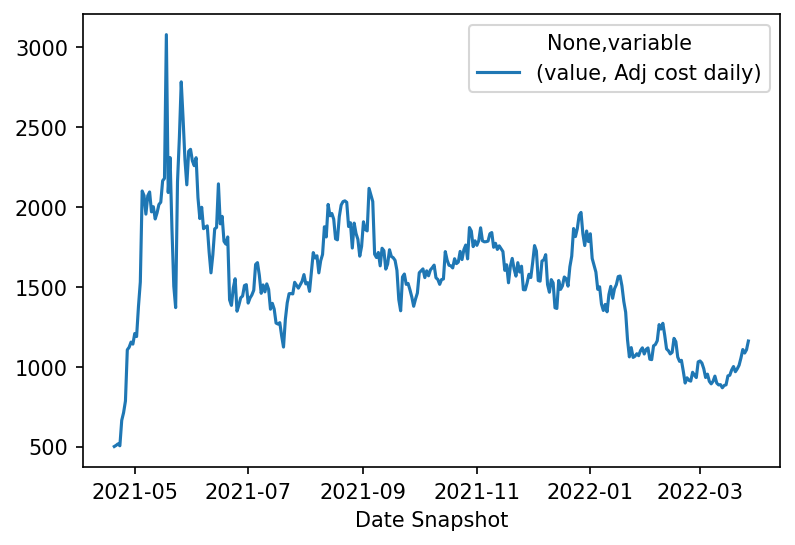

In [30]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    ["Adj cost daily"]
    ).plot(ax=ax)

## Portfolio gain/loss

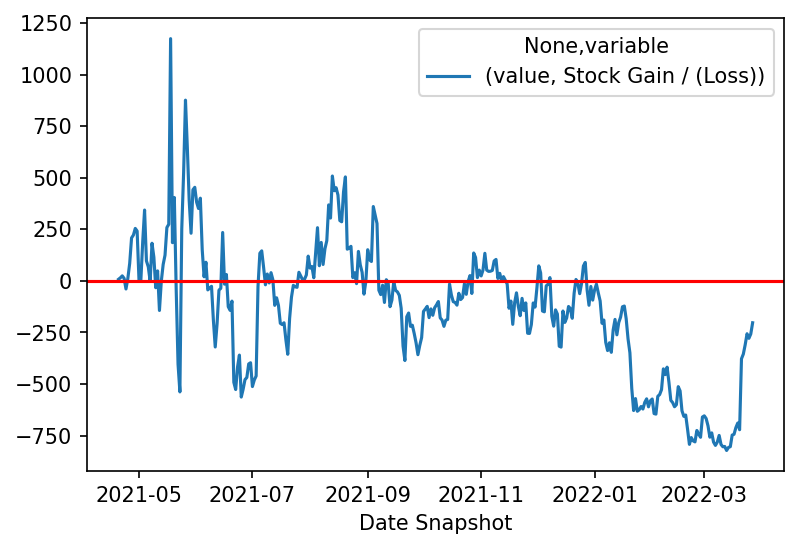

In [31]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    ["Stock Gain / (Loss)"]
    ).plot(ax=ax)
ax.axhline(0,color="r")

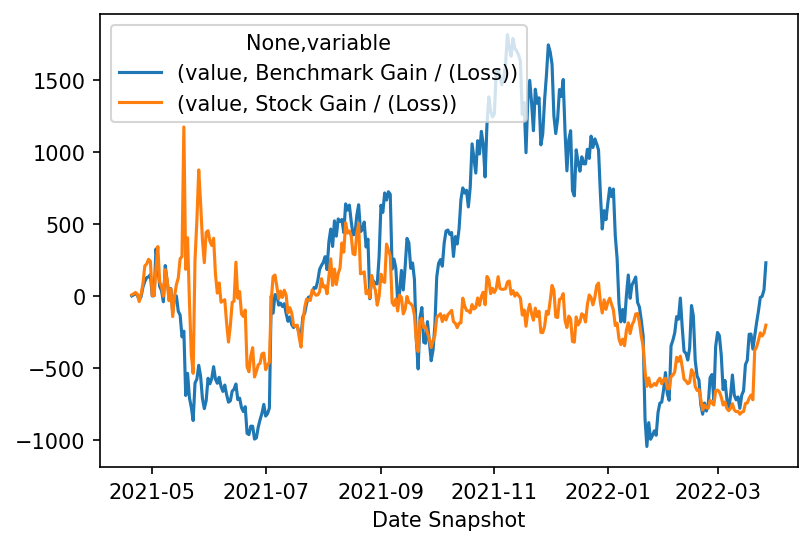

In [32]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    ["Stock Gain / (Loss)","Benchmark Gain / (Loss)"]
    ).plot(ax=ax)

### Portfolio value by symbol


In [33]:
t.daily_grouped_metrics(
    ["Adj cost daily"],
    by_symbol=True
    ).tail()

value                                               \
Symbol                  AAVE            ACH            ADA           ALGO   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-23        141.910240            NaN     153.154908     202.728840   
2022-03-24        153.359393            NaN     156.229707     215.764640   
2022-03-25        148.263641            NaN     152.134201     215.851823   
2022-03-26        148.822166            NaN     159.424446     221.285846   
2022-03-27        154.064620            NaN     163.840401     230.072928   

                                                                           \
Symbol                   AMP           COMP            ETC            ETH   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-23               NaN            NaN            NaN            NaN   
2022-03-24               NaN            NaN            NaN            NaN   
2022-03-25               NaN            NaN            NaN            NaN   
2022-03-26               NaN            NaN            NaN            NaN   
2022-03-27               NaN            NaN            NaN            NaN   

                                                                           \
Symbol                  MANA          MATIC            QNT            SOL   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-23               NaN     364.593157            NaN            NaN   
2022-03-24               NaN     381.469362            NaN            NaN   
2022-03-25               NaN     370.790689            NaN            NaN   
2022-03-26               NaN     378.090284            NaN            NaN   
2022-03-27               NaN     397.603027            NaN            NaN   

                                                                           
Symbol                 SUSHI            UNI           USDC           USDT  
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily  
Date Snapshot                                                              
2022-03-23         71.963115     120.156858       0.005887            NaN  
2022-03-24         71.386728     129.458193       0.005884            NaN  
2022-03-25         70.768705     127.742984       0.005894            NaN  
2022-03-26         71.021379     127.852342       0.005898            NaN  
2022-03-27         77.990581     137.362662       0.005900            NaN

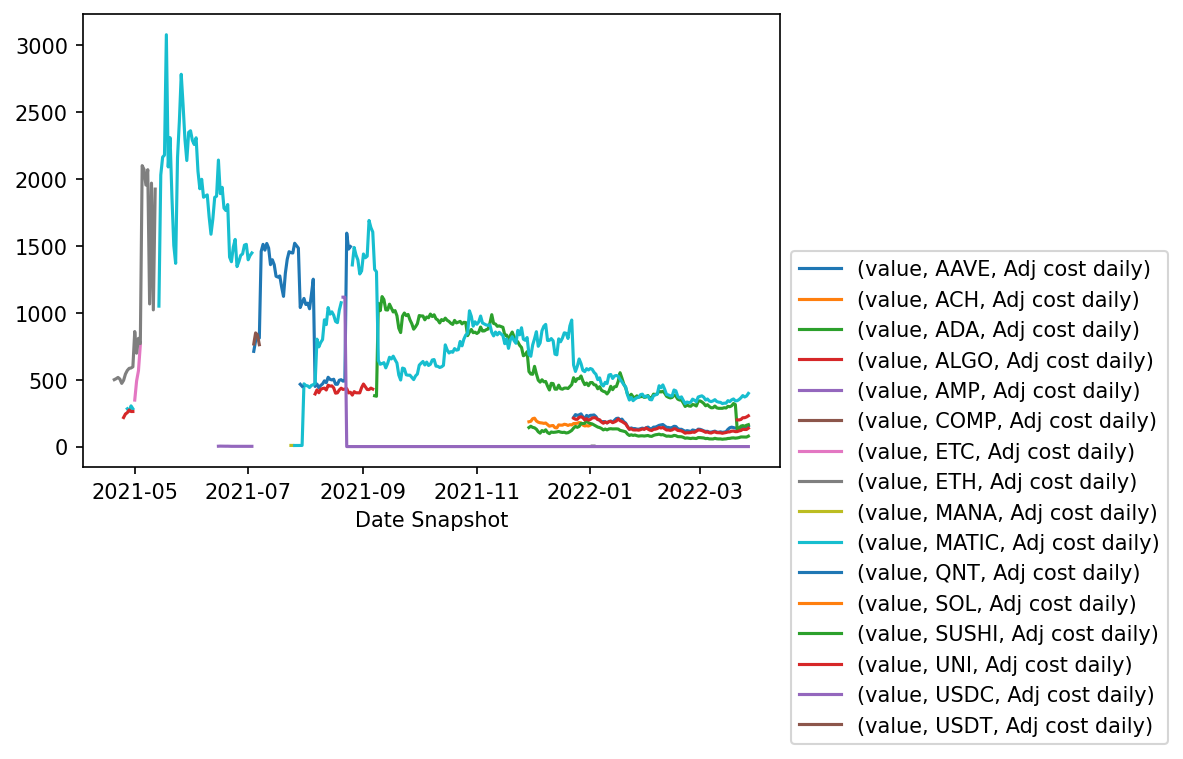

In [34]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    ["Adj cost daily"],
    by_symbol=True
    ).plot(ax=ax,legend=False)
ax.legend(bbox_to_anchor=(1,0.5))


### Stock gain by symbol

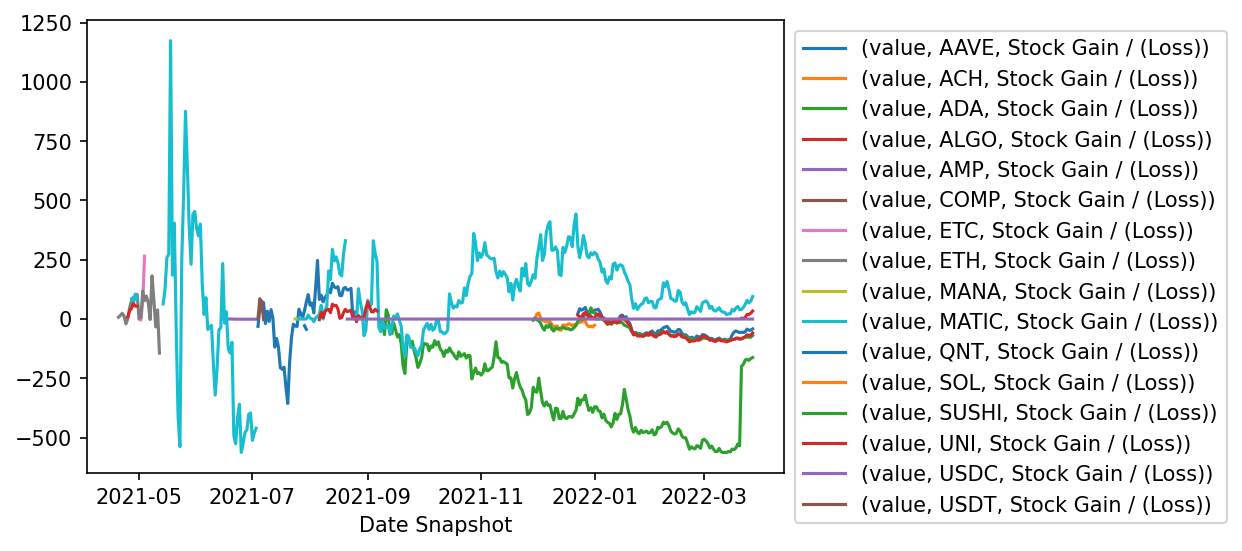

In [35]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    ["Stock Gain / (Loss)"],
    by_symbol=True
    ).plot(ax=ax,legend=False)
ax.legend(bbox_to_anchor=(1,1))

### Multiple variables by symbols

In [36]:
df=t.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
)
df.tail()

value                      \
Symbol                           AAVE                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-23                 -47.106752          -53.659760   
2022-03-24                 -43.375211          -42.210607   
2022-03-25                 -43.096811          -47.306359   
2022-03-26                 -41.317913          -46.747834   
2022-03-27                 -33.991933          -41.505380   

                                                           \
Symbol                            ACH                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-23                        NaN                 NaN   
2022-03-24                        NaN                 NaN   
2022-03-25                        NaN                 NaN   
2022-03-26                        NaN                 NaN   
2022-03-27                        NaN                 NaN   

                                                           \
Symbol                            ADA                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-23                 -34.501726         -172.857113   
2022-03-24                 -17.964561         -169.782314   
2022-03-25                 -16.730770         -173.877820   
2022-03-26                  -8.847181         -166.587575   
2022-03-27                  23.619544         -162.171620   

                                                           \
Symbol                           ALGO                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-23                   9.228412            6.308840   
2022-03-24                  14.397271           19.344640   
2022-03-25                  14.782905           19.431823   
2022-03-26                  17.247001           24.865846   
2022-03-27                  27.394805           33.652928   

                                                           ...  \
Symbol                            AMP                      ...   
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-03-23                        NaN                 NaN  ...   
2022-03-24                        NaN                 NaN  ...   
2022-03-25                        NaN                 NaN  ...   
2022-03-26                        NaN                 NaN  ...   
2022-03-27                        NaN                 NaN  ...   

                                                           \
Symbol                            SOL                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-23                        NaN                 NaN   
2022-03-24                        NaN                 NaN   
2022-03-25                        NaN                 NaN   
2022-03-26                        NaN                 NaN   
2022-03-27                        NaN                 NaN   

                                                           \
Symbol                          SUSHI                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-23                 -44.205971          -75.226885   
2022-03-24                 -41.617525          -75.803272   
2022-03-25                 -41.424408          -76.421295   
2022-03-26                 -40.190445          -76.168621   
2022-03-27                 -35.108656          -69.199419   

                                                           \
Symbol                            UNI                       
variable      B

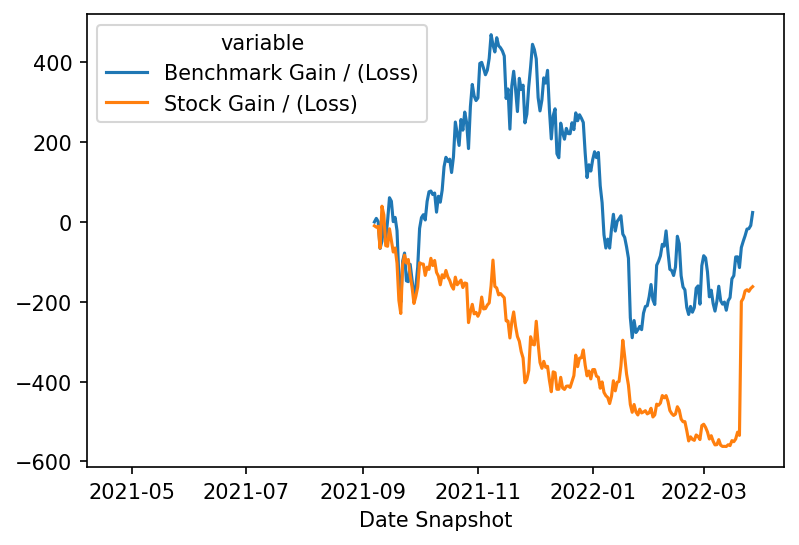

In [37]:
f, ax = plt.subplots(dpi=150)
df[("value","ADA")].plot(ax=ax)

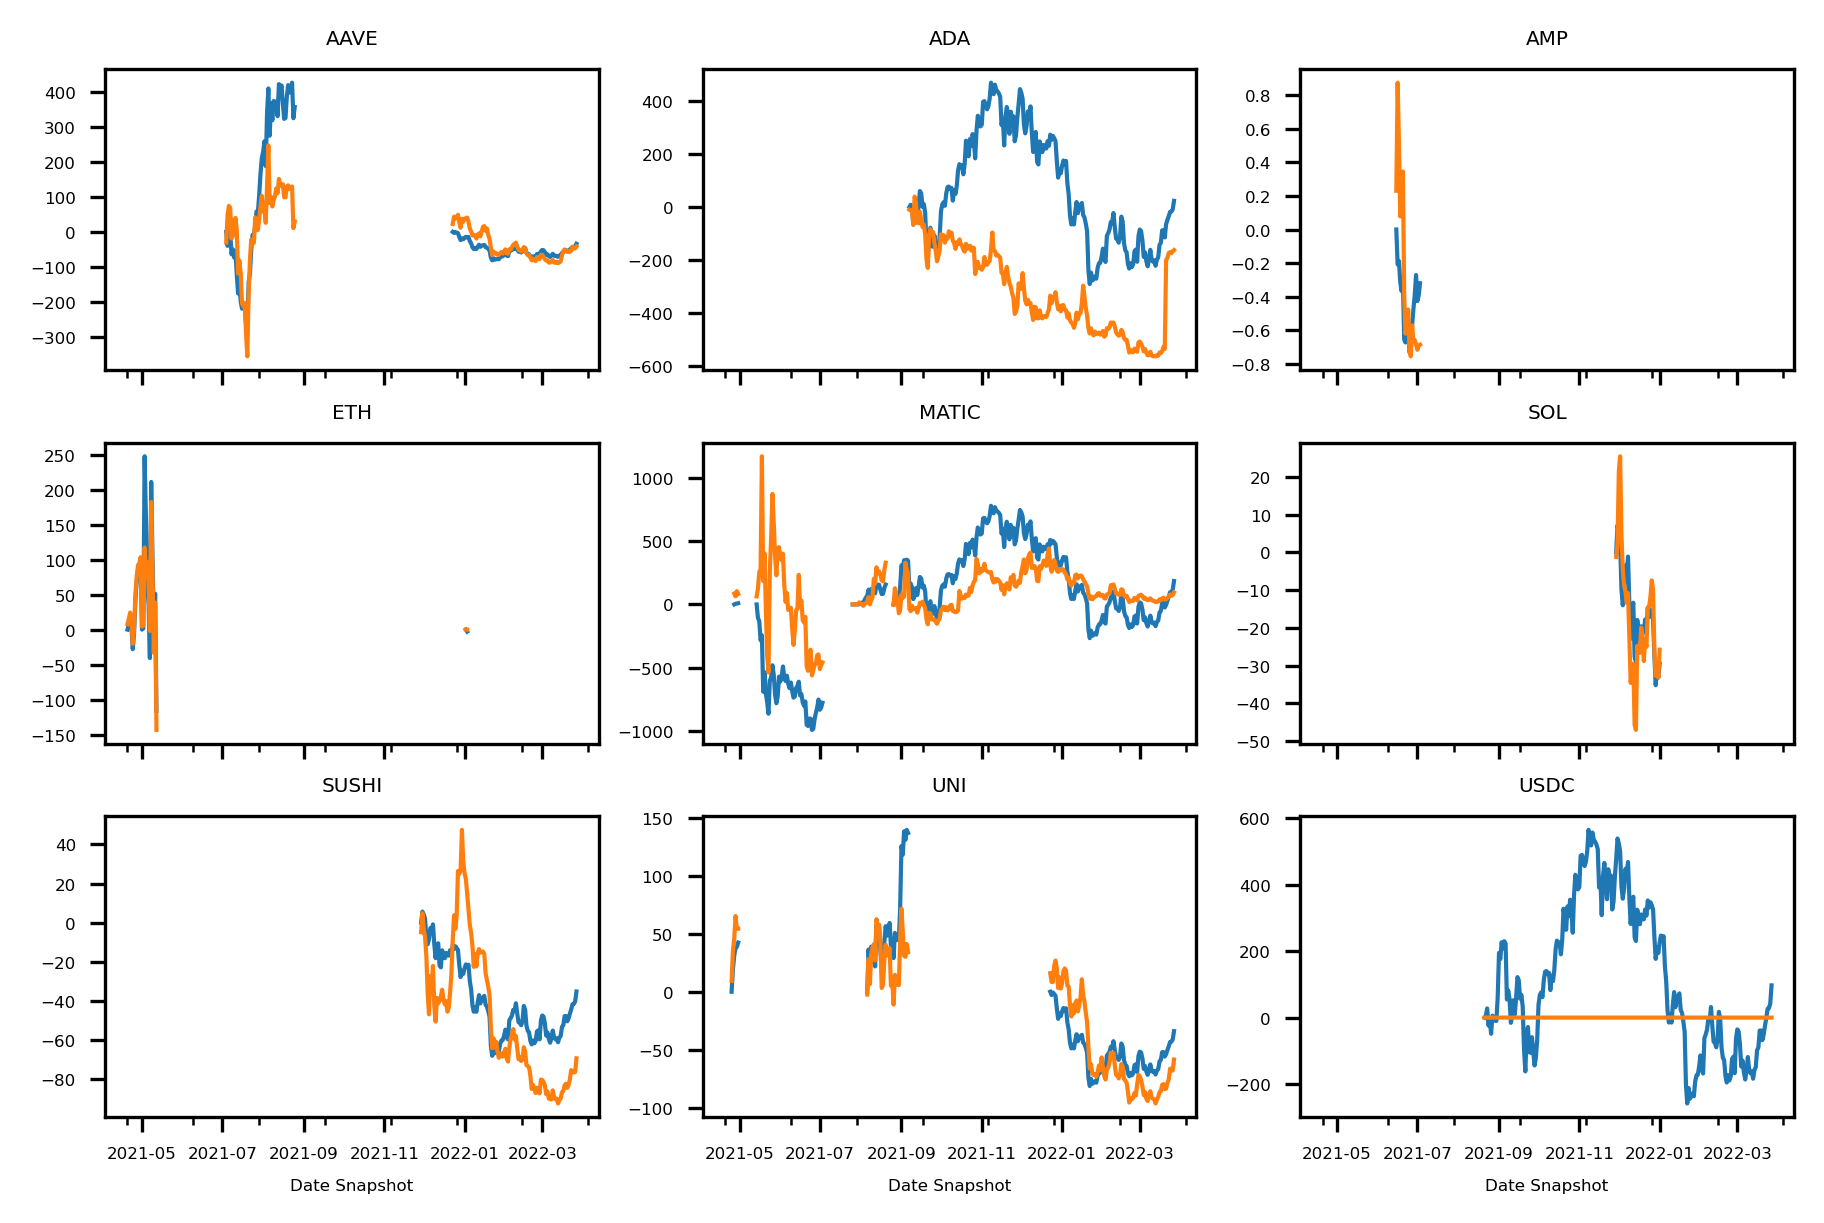

In [38]:
df=t.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    )
uniqs=df.columns.get_level_values(1).unique()
plt.rcParams.update({'font.size': 4})
select=[]
for coin in uniqs:
    if len(df[("value",coin)].dropna())>10:
        select.append(coin)
f,axes=plt.subplots(ncols=3,nrows=len(select)//3+len(select)%3,dpi=300,sharex=True)
for sel,ax in zip(select,axes.flatten()):
    df[("value",sel)].plot(ax=ax,legend=False,linewidth=1)
    ax.set_title(sel)
f.tight_layout()

#### Calplot

see investment throughout time.

In [39]:
values=t.daily_grouped_metrics(["Stock Gain / (Loss)"])[("value")]
values.index=pd.to_datetime(values.index)
values=values.reset_index().set_index("Date Snapshot")
values

variable,Stock Gain / (Loss)
Date Snapshot,
2021-04-20,7.812817
2021-04-21,15.048026
2021-04-22,24.336908
2021-04-23,12.212170
2021-04-24,-39.242299
...,...
2022-03-23,-309.326469
2022-03-24,-256.165566
2022-03-25,-278.281535


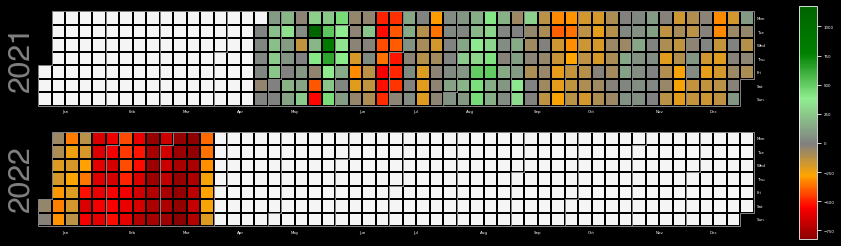

In [40]:
import calplot
from surfingcrypto.reporting.plotting import shiftedColorMap
import matplotlib.cm as cm
from matplotlib.colors import Normalize, LinearSegmentedColormap


norm = Normalize(vmin=values["Stock Gain / (Loss)"].min(), vmax=values["Stock Gain / (Loss)"].max())
cmap = shiftedColorMap(
    LinearSegmentedColormap.from_list(
        "colorbar",
        [
            "darkred",
            "red",
            "orange",
            "grey",
            "lightgreen",
            "green",
            "darkgreen",
        ],
    ),
    midpoint=norm(0)
)
c = calplot.calplot(
    values["Stock Gain / (Loss)"],
    cmap=cmap
    )

